In [1]:
import pandas as pd
import fasttext
import numpy as np
from sklearn.metrics import pairwise
import gensim

import matplotlib.pyplot as plt
import sentence_transformers
from sentence_transformers import models as sbert_models

In [2]:
from github_search import paperswithcode_tasks
from mlutil.feature_extraction import embeddings

In [3]:
# plt.style.use("dark_background")

In [4]:
%cd ..

/home/kuba/Projects/github_search


In [5]:
python_word_embeddings = gensim.models.Word2Vec.load(
    "output/abstract_readme_w2v200.bin"
)

INFO - 22:57:50: loading wv recursively from output/abstract_readme_w2v200.bin.wv.* with mmap=None
INFO - 22:57:50: loading vectors from output/abstract_readme_w2v200.bin.wv.vectors.npy with mmap=None
INFO - 22:57:50: setting ignored attribute vectors_norm to None
INFO - 22:57:50: loading vocabulary recursively from output/abstract_readme_w2v200.bin.vocabulary.* with mmap=None
INFO - 22:57:50: loading trainables recursively from output/abstract_readme_w2v200.bin.trainables.* with mmap=None
INFO - 22:57:50: loading syn1neg from output/abstract_readme_w2v200.bin.trainables.syn1neg.npy with mmap=None
INFO - 22:57:50: setting ignored attribute cum_table to None
INFO - 22:57:50: loaded output/abstract_readme_w2v200.bin


In [6]:
%%time
fasttext_model = fasttext.load_model("output/python_files_fasttext_dim200.bin")

CPU times: user 12.9 s, sys: 6.82 s, total: 19.7 s
Wall time: 22.1 s


In [7]:
fasttext_embedder = embeddings.FastTextVectorizer(fasttext_model)

In [8]:
python_embedder = embeddings.AverageWordEmbeddingsVectorizer(python_word_embeddings)

In [9]:
area_grouped_tasks = pd.read_csv("data/paperswithcode_tasks.csv").dropna()

In [10]:
area_grouped_tasks["task"] = area_grouped_tasks["task"].apply(
    paperswithcode_tasks.clean_task_name
)

In [11]:
task_embeddings = python_embedder.transform(area_grouped_tasks["task"])

In [12]:
import umap

In [13]:
umapper = umap.UMAP()

In [14]:
%%time
reduced_task_embeddings = umapper.fit_transform(task_embeddings)

CPU times: user 49.7 s, sys: 3.32 s, total: 53 s
Wall time: 6.9 s


In [15]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = "iframe"

import plotly.offline as pyo

In [16]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go

# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [17]:
def get_reduced_embeddings_df(data, embedder, reducer):
    data_embeddings = embedder.transform(data)
    reduced_task_embeddings = reducer.fit_transform(data_embeddings)
    return reduced_task_embeddings

In [18]:
for t in area_grouped_tasks.itertuples(index=False):
    task, area = t
    break

In [19]:
task

'adversarial'

In [20]:
def plot_2d_data(data, text_label, cls, annotated_tasks=None):
    cls_numbering = {c: i for (i, c) in enumerate(set(cls))}
    source_df = pd.DataFrame(
        {
            "x": data[:, 0],
            "y": data[:, 1],
            "task": text_label,
            "area": cls,
            "color": [cls_numbering[c] for c in cls],
        }
    )

    plot = px.scatter(
        data_frame=source_df, x="x", y="y", hover_data=["task", "area"], color="area"
    )
    fig = go.Figure(data=plot.data, layout=dict(width=1400, height=1000))
    if annotated_tasks is not None:
        annotated_source_df = source_df[source_df["task"].isin(annotated_tasks)]
        for row in annotated_source_df[["area", "task", "x", "y"]].itertuples(
            index=False
        ):
            area, task, x, y = row
            fig.add_annotation(x=x, y=y, text=area + ": " + task, bgcolor="white")
        # annotated_plot.for_each_trace(lambda t: t.update(textfont_color=t.marker.color))

    fig["layout"]["font"]["color"] = "gray"
    fig.show()

In [21]:
fasttext_embedder = embeddings.FastTextVectorizer(fasttext_model)
w2v_embedder = embeddings.AverageWordEmbeddingsVectorizer(
    word_embeddings=gensim.models.KeyedVectors.load(
        "output/abstract_readme_w2v200.bin"
    ).wv
)

INFO - 22:58:25: loading Word2VecKeyedVectors object from output/abstract_readme_w2v200.bin
INFO - 22:58:26: loading wv recursively from output/abstract_readme_w2v200.bin.wv.* with mmap=None
INFO - 22:58:26: loading vectors from output/abstract_readme_w2v200.bin.wv.vectors.npy with mmap=None
INFO - 22:58:26: setting ignored attribute vectors_norm to None
INFO - 22:58:26: loading vocabulary recursively from output/abstract_readme_w2v200.bin.vocabulary.* with mmap=None
INFO - 22:58:26: loading trainables recursively from output/abstract_readme_w2v200.bin.trainables.* with mmap=None
INFO - 22:58:26: loading syn1neg from output/abstract_readme_w2v200.bin.trainables.syn1neg.npy with mmap=None
INFO - 22:58:26: setting ignored attribute cum_table to None
INFO - 22:58:26: loaded output/abstract_readme_w2v200.bin


In [22]:
plot_2d_data(
    get_reduced_embeddings_df(area_grouped_tasks["task"], w2v_embedder, umap.UMAP()),
    area_grouped_tasks["task"],
    area_grouped_tasks["area"],
)

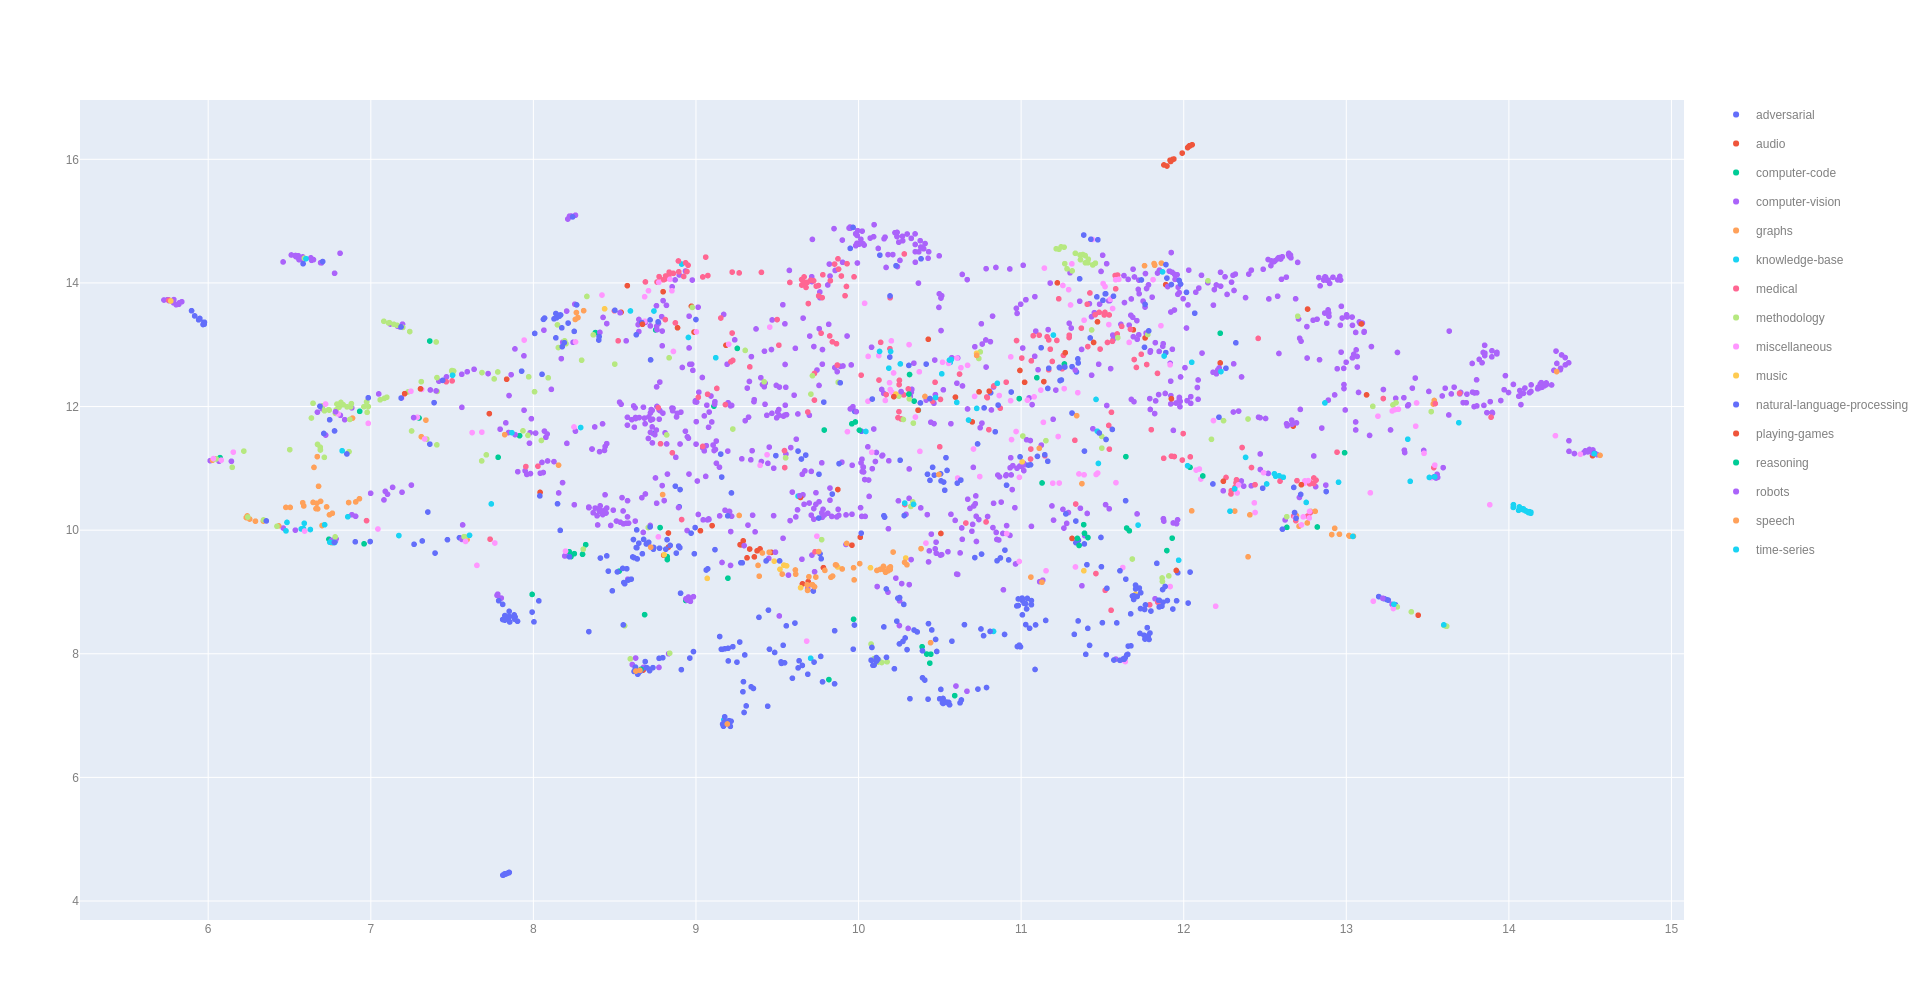

In [23]:
plot_2d_data(
    get_reduced_embeddings_df(
        area_grouped_tasks["task"], fasttext_embedder, umap.UMAP()
    ),
    area_grouped_tasks["task"],
    area_grouped_tasks["area"],
)

from github_search import sentence_embeddings_main

from sentence_transformers import models
w2v_file = "output/abstract_readme_w2v200.txt"
word_embedding_model = models.WordEmbeddings.from_text_file(w2v_file)
model = sentence_embeddings_main.make_rnn_model(
    word_embedding_model, "sru", 2, 256, 0.25 
)


children = list(model.children())#get_config_dict()

children[1].get_config_dict()

lstm_model.modules

In [24]:
!head -20 output/sbert/sru2x256_epoch1/modules.json

head: cannot open 'output/sbert/sru2x256_epoch1/modules.json' for reading: No such file or directory


In [25]:
!head -20 output/sbert/lstm2x256_epoch0//modules.json

[
  {
    "idx": 0,
    "name": "0",
    "path": "0_WordEmbeddings",
    "type": "sentence_transformers.models.WordEmbeddings"
  },
  {
    "idx": 1,
    "name": "1",
    "path": "1_LSTM",
    "type": "sentence_transformers.models.LSTM"
  },
  {
    "idx": 2,
    "name": "2",
    "path": "2_Pooling",
    "type": "sentence_transformers.models.Pooling"
  }
]

In [26]:
from mlutil import sentence_rnn

In [64]:
rnn_model_path = "output/sbert/sru2x256_epoch350/"
rnn_model = sentence_transformers.SentenceTransformer(rnn_model_path)

INFO - 23:39:18: Load pretrained SentenceTransformer: output/sbert/sru2x256_epoch350/
INFO - 23:39:19: Use pytorch device: cuda


In [65]:
rnn_reduced_embeddings = get_reduced_embeddings_df(
    area_grouped_tasks["task"],
    embeddings.SentenceTransformerWrapper(rnn_model),
    umap.UMAP(metric="cosine"),
)

Batches:   0%|          | 0/73 [00:00<?, ?it/s]

In [66]:
selected_tasks = [
    "audio tagging",
    "lip to speech synthesis",
    "drum transcription",
    "graph structure learning",
    "knowledge base completion",
    "robot navigation",
    "atari games",
    "polyp segmentation",
    "skin lesion identification",
    "hierarchical reinforcement learning",
]

In [67]:
area_grouped_tasks["task"].isin(selected_tasks).sum()

11

In [68]:
import glob
import os

In [69]:
result_paths = sorted(
    glob.glob("output/sbert/sru2x256_epoch*/*csv"), key=os.path.getmtime
)

In [70]:
result_dfs = [pd.read_csv(f) for f in result_paths]
for (p, df) in zip(result_paths, result_dfs):
    df["path"] = p.split("/")[-2]
results_df = pd.concat(result_dfs)

In [72]:
results_df[[col for col in results_df if "cos_sim" in col or "path" in col]]

cos_sim-Accuracy@1  cos_sim-Accuracy@3  cos_sim-Accuracy@5  \
0            0.536842            0.661053            0.711579   
0            0.581053            0.705263            0.755789   
0            0.629474            0.741053            0.783158   
0            0.637895            0.757895            0.802105   
0            0.658947            0.774737            0.804211   
0            0.682105            0.789474            0.835789   
0            0.688421            0.793684            0.848421   
0            0.705263            0.806316            0.852632   
0            0.688421            0.808421            0.850526   
0            0.684211            0.816842            0.856842   
0            0.686316            0.812632            0.861053   
0            0.684211            0.818947            0.865263   
0            0.675789            0.818947            0.867368   
0            0.682105            0.818947            0.865263   
0            0.686316            0.814737            0.858947   
0            0.690526            0.814737            0.856842   
0            0.690526            0.814737            0.852632   
0            0.696842            0.810526            0.856842   
0            0.692632            0.816842            0.858947   
0            0.696842            0.818947            0.858947   

   cos_sim-Accuracy@10  cos_sim-Precision@1  cos_sim-Recall@1  \
0             0.768421             0.536842          0.055450   
0             0.806316             0.581053          0.058563   
0             0.823158             0.629474          0.064621   
0             0.844211             0.637895          0.068332   
0             0.861053             0.658947          0.072574   
0             0.877895             0.682105          0.078133   
0             0.888421             0.688421          0.078876   
0             0.890526             0.705263          0.083227   
0             0.890526             0.688421          0.081498   
0             0.890526             0.684211          0.081239   
0             0.896842             0.686316          0.083670   
0             0.896842             0.684211          0.083370   
0             0.901053             0.675789          0.083733   
0             0.903158             0.682105          0.086429   
0             0.903158             0.686316          0.085243   
0             0.896842             0.690526          0.086761   
0             0.901053             0.690526          0.085750   
0             0.896842             0.696842          0.088342   
0             0.898947             0.692632          0.087165   
0             0.896842             0.696842          0.088346   

   cos_sim-Precision@3  cos_sim-Recall@3  cos_sim-Precision@5  \
0             0.483509          0.116979             0.454737   
0             0.541053          0.132950             0.509053   
0             0.575439          0.147347             0.535579   
0             0.591579          0.159724             0.547789   
0             0.601404          0.166614             0.556632   
0             0.615439          0.171470             0.569684   
0             0.621754          0.178998             0.576842   
0             0.625965          0.184279             0.577684   
0             0.623860          0.188119             0.578105   
0             0.631579          0.191791             0.587368   
0             0.625965          0.191484             0.586947   
0             0.625965          0.192255             0.587368   
0             0.628772          0.194736             0.589895   
0             0.630877          0.194502             0.592000   
0             0.633684          0.196563             0.587789   
0             0.635088          0.198459             0.589895   
0             0.632982          0.196694             0.589053   
0             0.632281          0.197580             0.585684   
0             0.634386          0.19

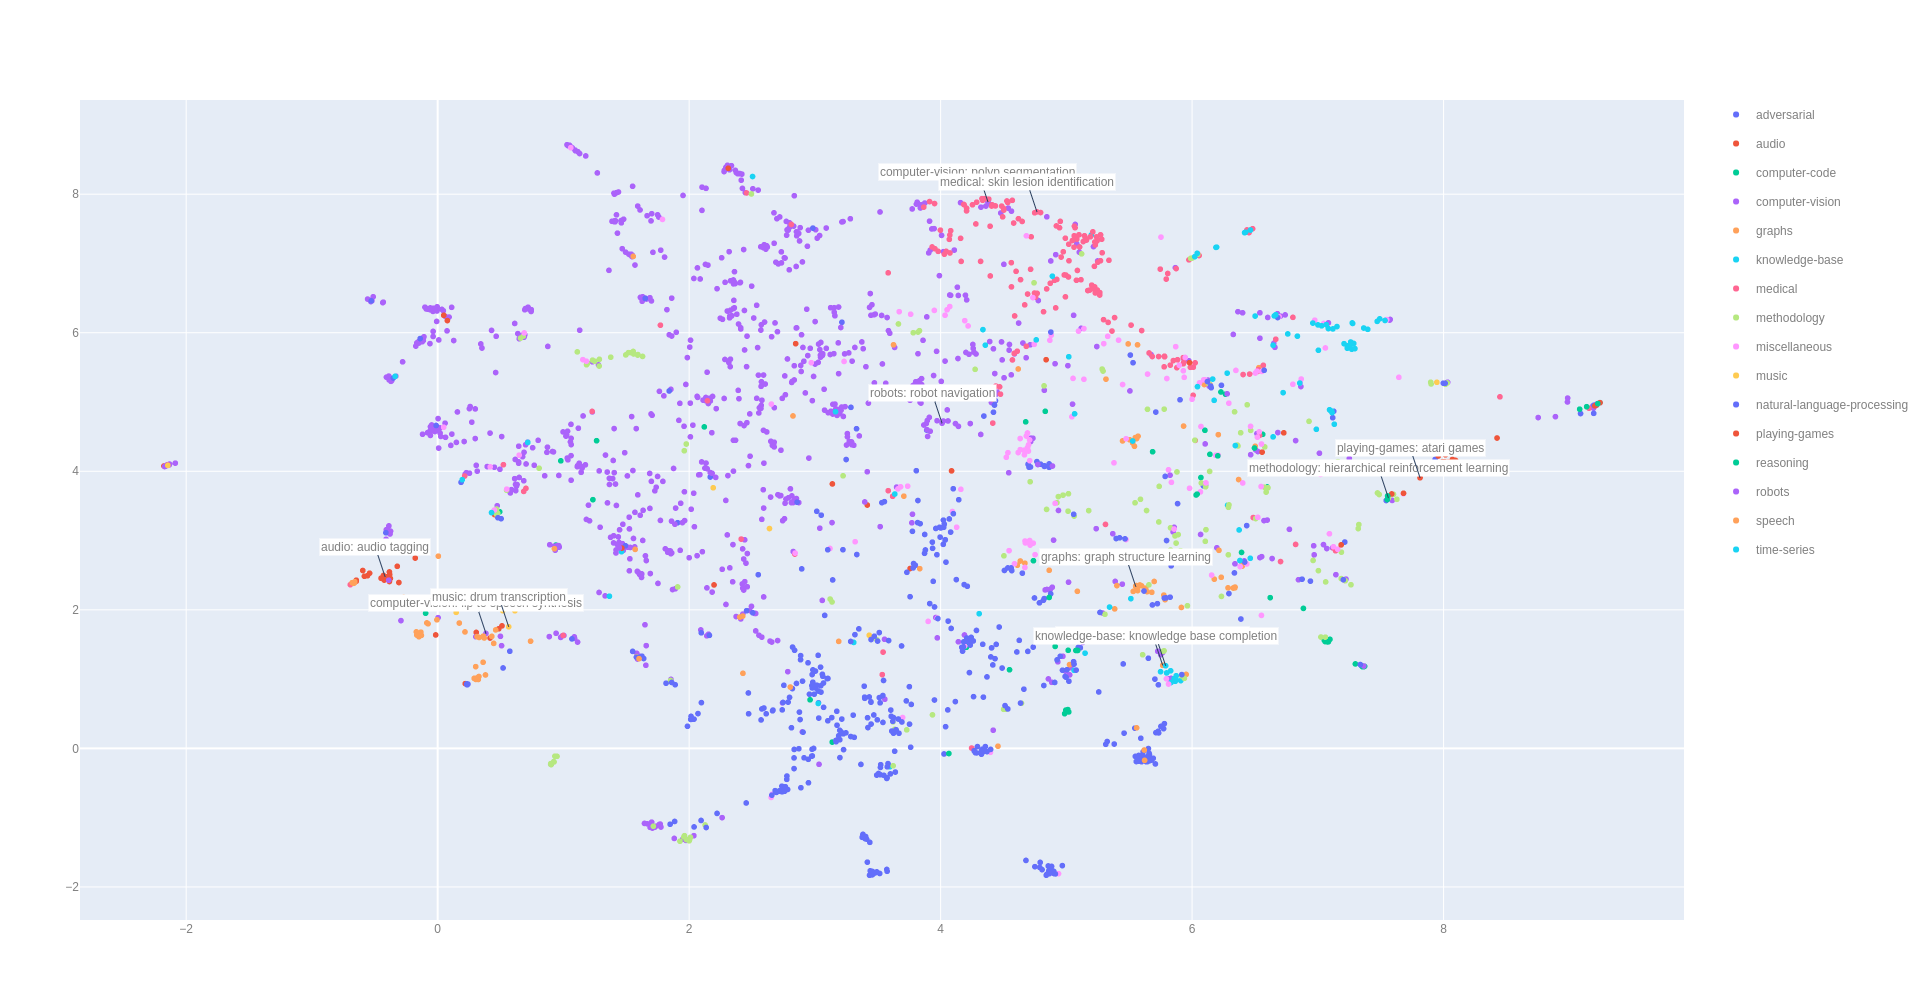

In [73]:
plot_2d_data(
    rnn_reduced_embeddings,
    area_grouped_tasks["task"],
    area_grouped_tasks["area"],
    annotated_tasks=selected_tasks,
)

In [36]:
codebert_model = sentence_transformers.SentenceTransformer("output/sbert/codebert10/")

INFO - 22:58:47: Load pretrained SentenceTransformer: output/sbert/codebert10/
INFO - 22:58:48: Use pytorch device: cuda


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

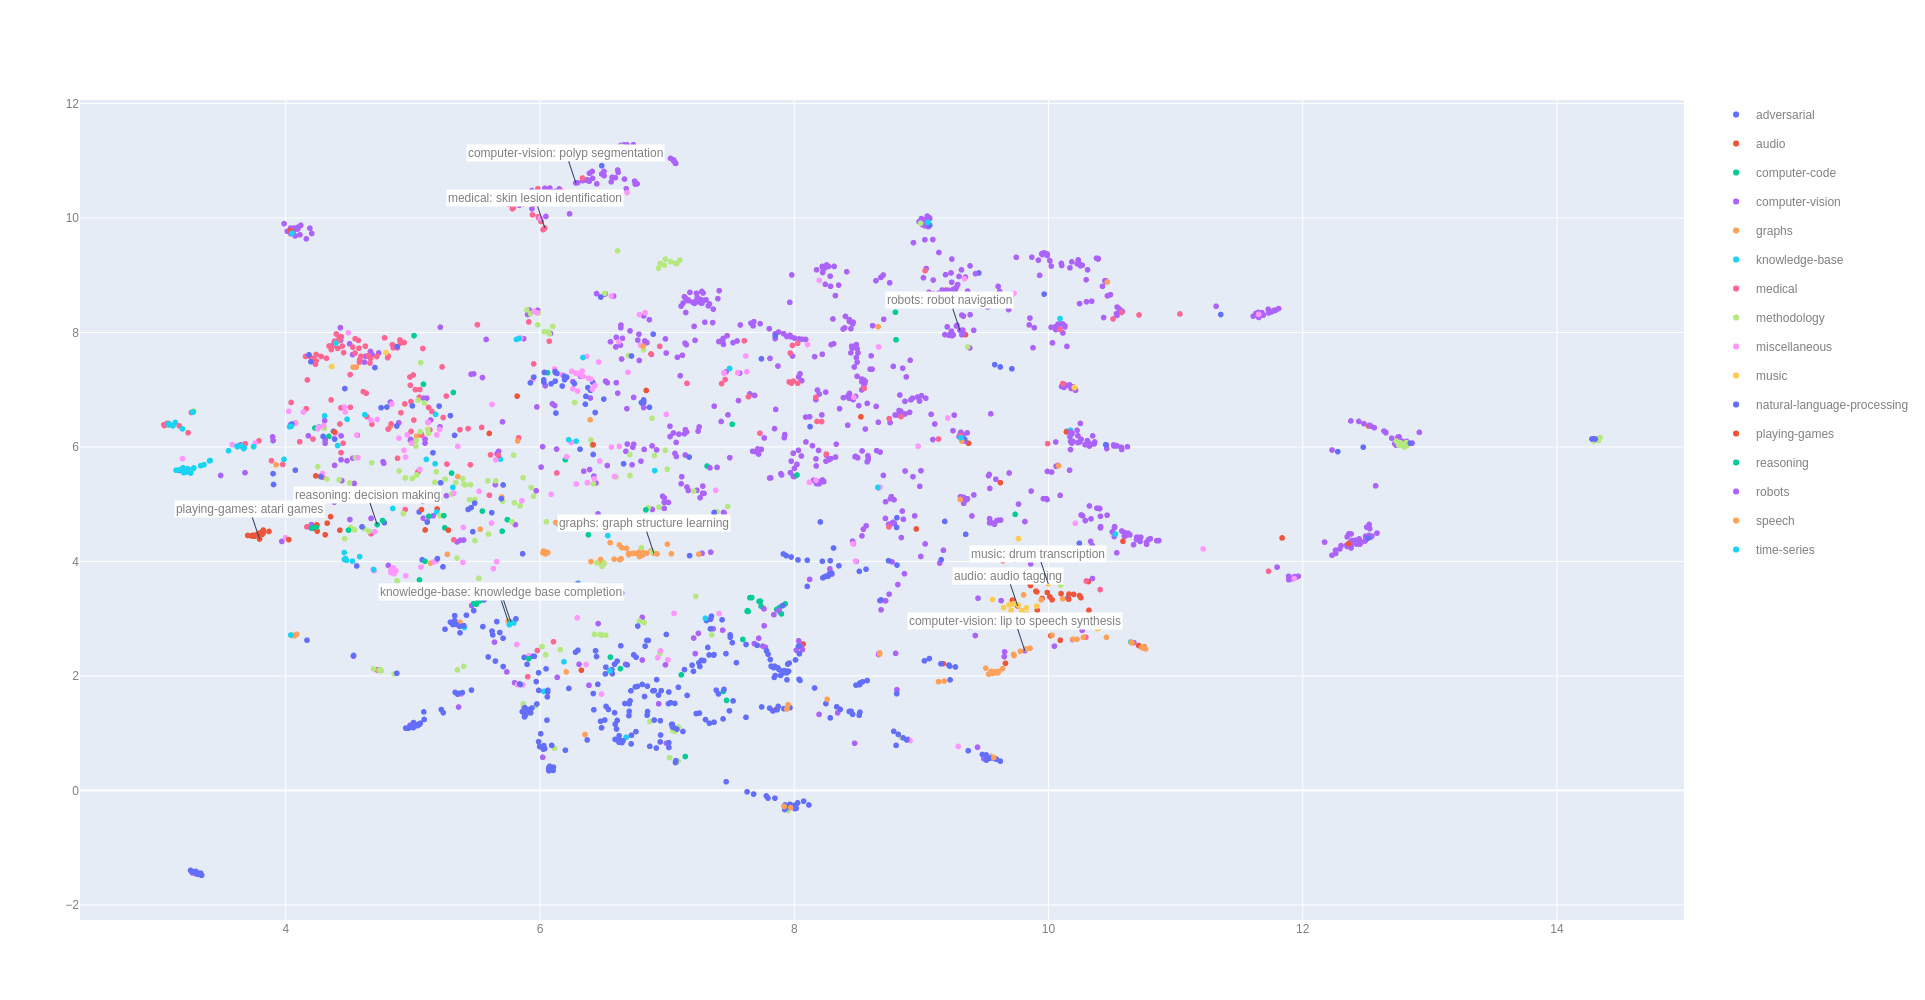

In [37]:
plot_2d_data(
    get_reduced_embeddings_df(
        area_grouped_tasks["task"],
        embeddings.SentenceTransformerWrapper(codebert_model),
        umap.UMAP(metric="cosine"),
    ),
    area_grouped_tasks["task"],
    area_grouped_tasks["area"],
    annotated_tasks=selected_tasks,
)